# Clustering Methods Review

In [15]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## iris를 통해 복습하는 K-means / K-means++

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)

In [11]:
df.columns = ['Sepal_length', 'Sepal_width',
             'Petal_length', 'Petal_width']

In [12]:
petal_df = df[['Petal_length', 'Petal_width']]

<AxesSubplot:xlabel='Petal_length', ylabel='Petal_width'>

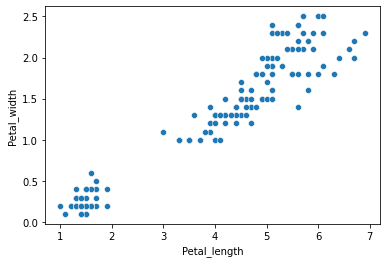

In [17]:
sns.scatterplot(x = 'Petal_length', y = 'Petal_width',
               data = petal_df)

다음과 같이 데이터가 분포하고 있음을 알 수 있다.
K-means를 적용할려고 한다. 여기서 기본적으로 Iris는 3개의 class으로 이루어져 있기에 우선은 3개로 나누어 보고 나머지 결과를 비교하려고 한다.

In [20]:
from sklearn.cluster import KMeans
# Remark. init의 경우 아무 말도 없을 경우 sklearn에서는 k-means++로 설정
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(petal_df)

<AxesSubplot:xlabel='Petal_length', ylabel='Petal_width'>

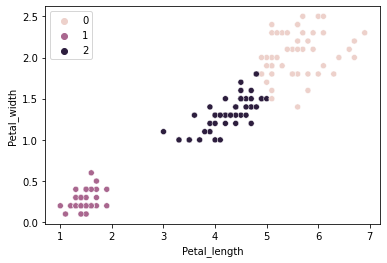

In [22]:
sns.scatterplot(x = 'Petal_length', y = 'Petal_width',
               data = petal_df, hue = kmeans.labels_)

아래와 같이 3개의 label로 깔끔하게 나왔음을 알 수 있다.

## DBSCAN의 적용 예시

k-means로 풀기 어려운 문제가 존재한다. 예시 데이터를 직접 만들어보고자 한다.

In [30]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples = 250, noise = 0.05, random_state = 42)

In [31]:
df = pd.DataFrame(x)

<AxesSubplot:xlabel='0', ylabel='1'>

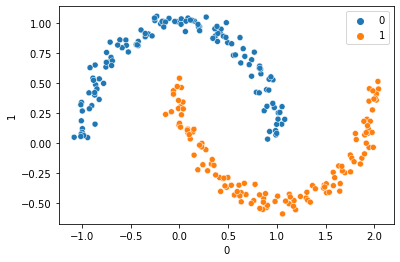

In [33]:
sns.scatterplot(x = df[0], y = df[1], hue = y)

다음과 같은 형태로 주어져있다. 실전에서 label인 y가 주어지지 않은 형태로 데이터를 받았다고 할때 (즉 x만)  y처럼 분배할 수 있을 것인가?

<AxesSubplot:xlabel='0', ylabel='1'>

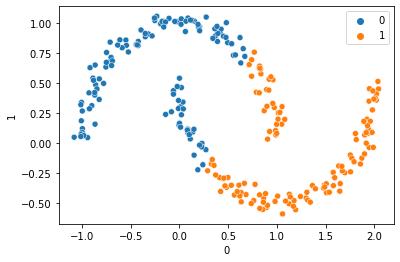

In [34]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(df)
sns.scatterplot(x = df[0], y = df[1], hue = kmeans.labels_)

이렇게 달 단위로 분배되는 것이 아니라 좌우 형태로 분해되었다.

<AxesSubplot:xlabel='0', ylabel='1'>

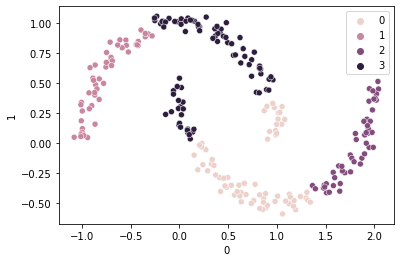

In [35]:
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(df)
sns.scatterplot(x = df[0], y = df[1], hue = kmeans.labels_)

이는 클러스터링 개수를 늘려도 유사하게 되어, k-means만으로는 이러한 상황을 해결하기 어려움을 알 수 있다.

<AxesSubplot:xlabel='0', ylabel='1'>

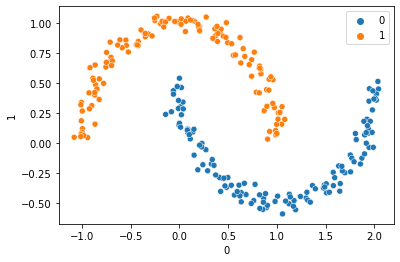

In [44]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps = 0.3, min_samples = 5).fit(df)
sns.scatterplot(x = df[0], y = df[1], hue = db_scan.labels_)

dbscan을 활용하면 인접한 애들을 묶어주는 방식으로(기하적 위치를 고려)
달이 잘 분리되었다만, eps와 min_sample을 변경하면 무슨 일이 일어날까?

<AxesSubplot:xlabel='0', ylabel='1'>

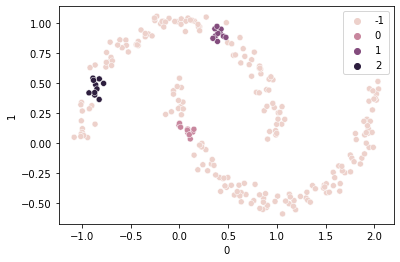

In [50]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps = 0.1, min_samples = 10).fit(df)
sns.scatterplot(x = df[0], y = df[1], hue = db_scan.labels_)

아래와 같이 eps랑 샘플 수를 변경한 결과, 적합하지 않은 분리를 보여주고 있다.
dbscan에서는 적절한 eps의 값과 min_samples의 설정이 필요하다.
클러스터 개수를 지정하는 것이 아니라 위치 관계에 의해서 클러스터가 결정되기 때문이다.